In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('IMDB-Movie-Data.csv')

In [14]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values in important columns
df = df.dropna(subset=['Revenue (Millions)', 'Metascore'])

Rank                   0
Title                  0
Genre                  0
Description            0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue (Millions)     0
Metascore             34
dtype: int64


In [16]:
print(df.isnull().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [18]:
# Clean revenue column (if necessary)
df['Revenue (Millions)'] = df['Revenue (Millions)'].astype(float)

In [20]:
print(df['Revenue (Millions)'])

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
993     60.13
994     54.72
996     17.54
997     58.01
999     19.64
Name: Revenue (Millions), Length: 838, dtype: float64


In [26]:
# Top 5 movies with the highest IMDb ratings
top_movies = df.nlargest(5, 'Rating')[['Title', 'Rating']]
print(top_movies)

                Title  Rating
54    The Dark Knight     9.0
80          Inception     8.8
36       Interstellar     8.6
96      Kimi no na wa     8.6
249  The Intouchables     8.6


In [28]:
# Average revenue
average_revenue = df['Revenue (Millions)'].mean()
print(f"Average Revenue: {average_revenue:.2f}M USD")

Average Revenue: 84.56M USD


In [32]:
df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [40]:
# Split genres into individual entries
genres_split = df['Genre'].str.split(',').explode()
print(genres_split)

0         Action
0      Adventure
0         Sci-Fi
1      Adventure
1        Mystery
         ...    
997        Music
997      Romance
999       Comedy
999       Family
999      Fantasy
Name: Genre, Length: 2190, dtype: object


In [42]:
# Count the occurrences of each genre
genre_counts = genres_split.value_counts()
print(genre_counts)

Genre
Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
Name: count, dtype: int64


/tmp/ipykernel_18311/4090778207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


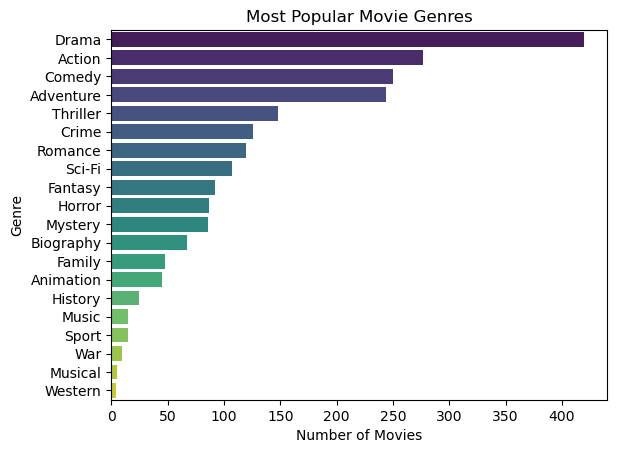

In [44]:
# Plot the genres
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Most Popular Movie Genres')
plt.xlabel('Number of Movies')
plt.show()

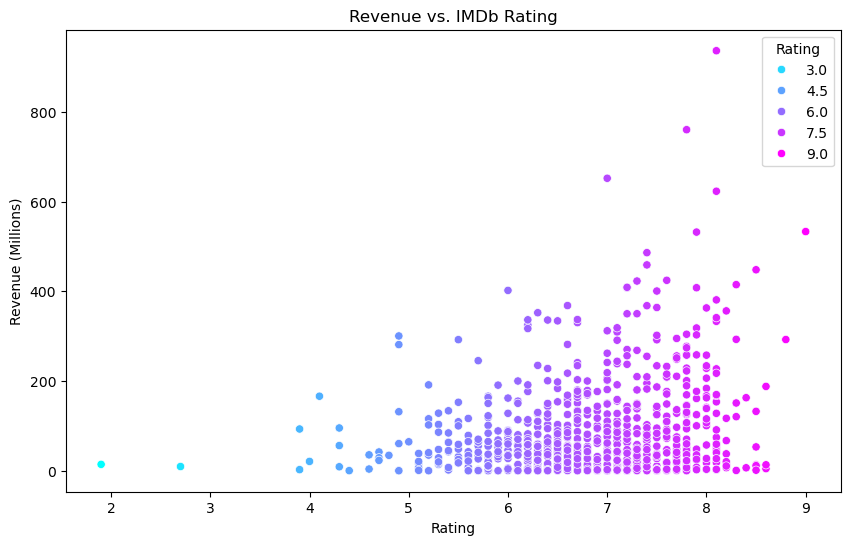

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)', hue='Rating', palette='cool')
plt.title('Revenue vs. IMDb Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.show()

In [54]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
movies_per_year = df['Year'].value_counts().sort_index()
print(movies_per_year)

Year
2006     41
2007     44
2008     48
2009     45
2010     57
2011     57
2012     62
2013     84
2014     93
2015    109
2016    198
Name: count, dtype: int64


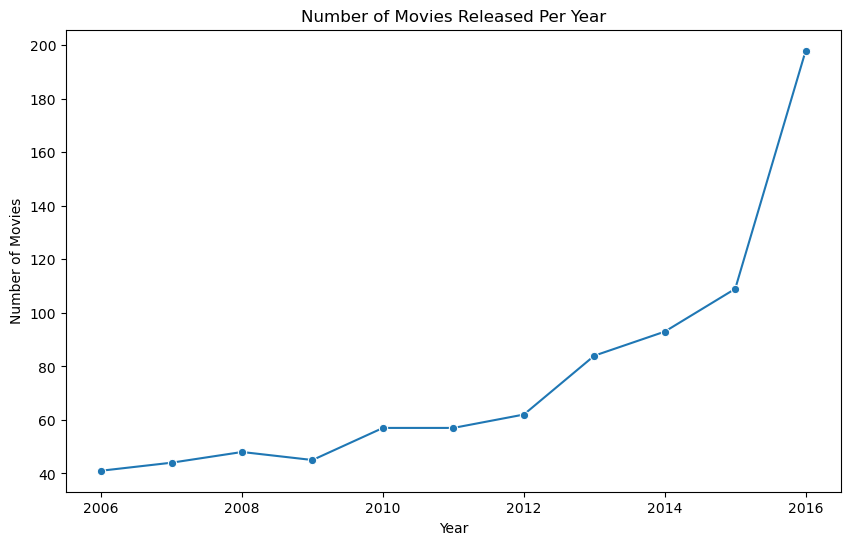

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [58]:
top_revenue_movies = df.nlargest(5, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']]
print(top_revenue_movies)

                                         Title  Revenue (Millions)
50  Star Wars: Episode VII - The Force Awakens              936.63
87                                      Avatar              760.51
85                              Jurassic World              652.18
76                                The Avengers              623.28
54                             The Dark Knight              533.32


In [60]:
# Save the top 5 movies and revenue data
top_movies.to_csv('Top_5_IMDB_Movies.csv', index=False)
top_revenue_movies.to_csv('Top_5_Revenue_Movies.csv', index=False)